<a href="https://colab.research.google.com/github/fatymaNaseem/week-5-task/blob/main/week5_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from collections import Counter
import re
import plotly.express as px
import plotly.io as pio
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

pio.templates.default = "plotly_white"

from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the uploaded file into a DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Display the first few rows of the DataFrame
print(df.head())



# Check for null values, column info, and descriptive statistics
print("Null values in each column:\n", df.isnull().sum())
print("\nDataFrame Info:\n", df.info())
print("\nDescriptive Statistics:\n", df.describe())


Saving Queries.csv to Queries (1).csv
                                 Top queries  Clicks  Impressions     CTR  \
0                number guessing game python    5223        14578  35.83%   
1                        thecleverprogrammer    2809         3456  81.28%   
2           python projects with source code    2077        73380   2.83%   
3  classification report in machine learning    2012         4959  40.57%   
4                      the clever programmer    1931         2528  76.38%   

   Position  
0      1.61  
1      1.02  
2      5.94  
3      1.28  
4      1.09  
Null values in each column:
 Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impression

In [4]:
# Remove the '%' sign and convert the CTR column to float
df['CTR'] = df['CTR'].str.replace('%', '').astype(float) / 100

# Verify the conversion
print(df['CTR'].head())


0    0.3583
1    0.8128
2    0.0283
3    0.4057
4    0.7638
Name: CTR, dtype: float64


In [6]:
# Function to clean and split the queries into words
def clean_and_split(query):
    query = re.sub(r'[^a-zA-Z0-9\s]', '', query)  # Remove special characters
    words = query.lower().split()
    return words

# Apply the function to the 'Top Queries' column and count the word frequencies
df['Words'] = df['Top queries'].apply(clean_and_split)
all_words = [word for words_list in df['Words'] for word in words_list]
word_counts = Counter(all_words)

# Plot the word frequencies
word_freq_df = pd.DataFrame(word_counts.most_common(), columns=['Word', 'Frequency'])
fig = px.bar(word_freq_df.head(20), x='Word', y='Frequency', title='Top 20 Word Frequencies in Search Queries')
fig.show()


In [7]:
# Top queries by clicks
top_queries_by_clicks = df.sort_values(by='Clicks', ascending=False).head(10)
print("\nTop 10 Queries by Clicks:\n", top_queries_by_clicks[['Top queries', 'Clicks']])

# Top queries by impressions
top_queries_by_impressions = df.sort_values(by='Impressions', ascending=False).head(10)
print("\nTop 10 Queries by Impressions:\n", top_queries_by_impressions[['Top queries', 'Impressions']])



Top 10 Queries by Clicks:
                                  Top queries  Clicks
0                number guessing game python    5223
1                        thecleverprogrammer    2809
2           python projects with source code    2077
3  classification report in machine learning    2012
4                      the clever programmer    1931
5        standard scaler in machine learning    1559
6                               aman kharwal    1490
7                python turtle graphics code    1455
8      python game projects with source code    1421
9        82 python projects with source code    1343

Top 10 Queries by Impressions:
                           Top queries  Impressions
2    python projects with source code        73380
82                           r2 score        56322
34           machine learning roadmap        42715
21              classification report        39896
232                    standardscaler        39267
91     facebook programming languages        36055

In [9]:
# Queries with highest CTRs
highest_ctrs = df.sort_values(by='CTR', ascending=False).head(10)
print("\nTop 10 Queries with Highest CTRs:\n", highest_ctrs[['Top queries', 'CTR']])

# Queries with lowest CTRs
lowest_ctrs = df.sort_values(by='CTR', ascending=True).head(10)
print("\nTop 10 Queries with Lowest CTRs:\n", lowest_ctrs[['Top queries', 'CTR']])



Top 10 Queries with Highest CTRs:
                                            Top queries     CTR
928                           the cleverprogrammer.com  0.8548
927                          the clever programmer.com  0.8281
1                                  thecleverprogrammer  0.8128
732               the clever programmer python project  0.7857
307    the clever programmer machine learning projects  0.7735
4                                the clever programmer  0.7638
964               python program to send otp to mobile  0.7083
95                        the card game code in python  0.6699
771  write a python program that calculates number ...  0.6632
137  python program to calculate number of seconds ...  0.6585

Top 10 Queries with Lowest CTRs:
                         Top queries     CTR
929                   python turtle  0.0029
232                  standardscaler  0.0045
423   classification report sklearn  0.0047
544                 standard scaler  0.0048
981             

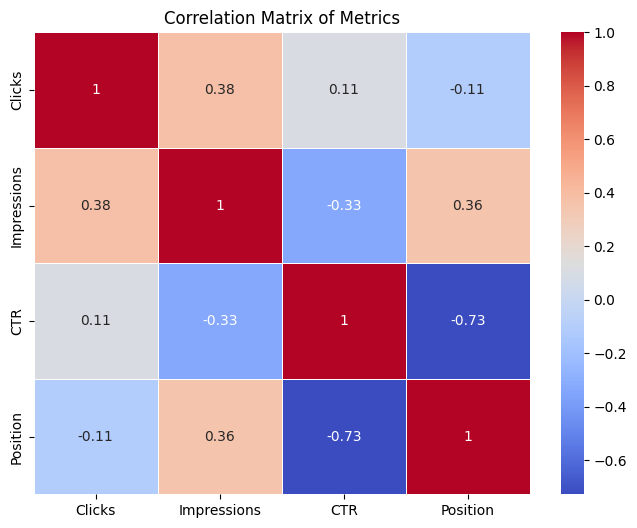


Correlation Observations:
                Clicks  Impressions       CTR  Position
Clicks       1.000000     0.377256  0.106758 -0.111582
Impressions  0.377256     1.000000 -0.331126  0.357921
CTR          0.106758    -0.331126  1.000000 -0.728320
Position    -0.111582     0.357921 -0.728320  1.000000


In [10]:
# Calculate the correlation matrix
correlation_matrix = df[['Clicks', 'Impressions', 'CTR', 'Position']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Metrics')
plt.show()

# Observations from the correlation matrix
print("\nCorrelation Observations:\n", correlation_matrix)


In [12]:
# Select the features for anomaly detection
features = df[['Clicks', 'Impressions', 'CTR', 'Position']]

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict anomalies (outliers)
df['Anomaly'] = isolation_forest.fit_predict(features)

# Display anomalies
anomalies = df[df['Anomaly'] == -1]
print("\nDetected Anomalies:\n", anomalies[['Top queries', 'Clicks', 'Impressions', 'CTR', 'Position']])

# Plot the anomalies
fig = px.scatter(df, x='Impressions', y='Clicks', color='Anomaly', title='Anomaly Detection in Search Queries')
fig.show()



Detected Anomalies:
                                       Top queries  Clicks  Impressions  \
0                     number guessing game python    5223        14578   
1                             thecleverprogrammer    2809         3456   
2                python projects with source code    2077        73380   
3       classification report in machine learning    2012         4959   
4                           the clever programmer    1931         2528   
5             standard scaler in machine learning    1559         7292   
6                                    aman kharwal    1490         5752   
7                     python turtle graphics code    1455        13585   
8           python game projects with source code    1421         4946   
9             82 python projects with source code    1343         3562   
10                        guess the number python    1287         4569   
11                              clever programmer    1243        21566   
12    car price 